In [1]:
#load libraries
import lib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import NearestNeighbors
from sklearn.svm import LinearSVC

In [84]:
#load dataset
X,y = lib.generate_circle(samples=500)

In [50]:
np.shape(div)

(1, 500)

In [49]:
w = params_to_coef(X,y)
div = np.transpose(division(X,y,w))
big_div = np.ones((1,len(y)))

In [80]:
def division(X,y,w):
    a = -w[0] / w[1]
    Xsvm = a * X[:,0] - w[2] / w[1]
    div = np.copy(y)
    div.fill(0)
    div[X[:,1]>Xsvm] = 1
    div = np.transpose(np.reshape(div,(-1,1)))
    return div

def smallify_dataset(X,y,sep):
#     print(sep)
    y_left = y[sep==0]
    X_left = X[sep==0]
    y_right = y[sep==1]
    X_right = X[sep==1]
    return X_left, y_left,  X_right,  y_right

In [81]:
#caluculate nearest neighbors
def find_nn(X,y,n_neighbors=50,n_most_different=50):
    nbrs = NearestNeighbors(n_neighbors=n_neighbors, algorithm='ball_tree').fit(X)
    distances, indices = nbrs.kneighbors(X)
    ys = y[indices]
    Xs = X[indices]
    most_different_nn = np.argsort(-np.var(ys,1))[:n_most_different]
    most_different_var = -np.sort(-np.var(ys,1))[:n_most_different]
    return Xs[most_different_nn],ys[most_different_nn],most_different_var

def find_proper_svm(X,y):
    Xs,ys,var = find_nn(X,y)
    combined_score = []
    clf = LinearSVC(random_state=0, tol=1e-5)
    for i in range(len(ys)):
        clf.fit(Xs[i], ys[i])
#         print(f'{clf.score(Xs[i],ys[i])} {clf.score(X,y)}')
#         plotting_funciton(clf,X,y)
        combined_score.append(clf.score(Xs[i], ys[i])*var[i])
    am = np.argmax(combined_score)
    return clf.fit(Xs[am], ys[am])

def params_to_coef(X,y):
    svm = find_proper_svm(X,y)
    w = np.array([svm.coef_[0][0],svm.coef_[0][1],svm.intercept_[0]])
    return w

In [82]:
x = np.matrix([1,2])
y = np.repeat(x, 5, axis=0)
for row in y:
    print(row)

[[1 2]]
[[1 2]]
[[1 2]]
[[1 2]]
[[1 2]]


In [119]:
np.shape(st.div[0,:]*np.ones((1,len(y))))

(1, 500)

In [170]:
class svm_tree:
    def __init__(self,X,y,depth=5):
        self.X = X
        self.y = y
        self.depth = depth

        w = params_to_coef(X,y)
        self.big_w = np.array(w)
        
        #div
        self.div = division(X,y,w)
        self.big_div = np.ones((1,len(y)))
#         self.forward_div()
#         self.big_div = np.concatenate((self.big_div,self.div),axis=0)

        #run each of the duplicates through svm 
        
        #append div
        
        #svm parameters
#         self.svm_param =  np.zeros((2**n_levels,3)) #maybe delete
        
    #######################start loop here

        for level in range(0, self.depth):
            w_row = []
            div_row = []
            for row in self.div:
                if np.std(row):
                    X_left, y_left,  X_right,  y_right = smallify_dataset(X,y,row)
                
                if np.std(y_left):
                    wl = params_to_coef(X_left, y_left)
                    w_row.append(wl)
                    div_row.append(np.multiply(row,division(X,y,wl)))
                else: 
                    w_row.append(np.array([0,0,0]))
                    div_row.append(np.multiply((1-row),np.ones((1,len(self.y)))))
                    
                    
                if np.std(y_right):
                    wr = params_to_coef(X_right,  y_right)
                    w_row.append(wr)
                    div_row.append(np.multiply((1-row),division(X,y,wr)))
                else: 
                    w_row.append(np.array([0,0,0]))
                    div_row.append(np.multiply((1-row),np.ones((1,len(self.y)))))
            w_row = np.array(w_row)
#             self.big_w = np.concatenate(self.big_w,w_row) #fix later
            self.div = np.squeeze(np.array(div_row),1)

                    
            self.forward_div()
                

                
                
            
            
            # the routing division at current level
#             _decision = decision[:, begin_idx:end_idx, :] # -> [batch_size,2**n_layer,2]
#             mu = mu*_decision # -> [batch_size,2**n_layer,2]
#             begin_idx = end_idx
#             end_idx = begin_idx + 2 ** (n_layer+1)
#             # merge left and right nodes to the same layer
#             mu = mu.view(x.size(0), -1, 1)
#             big_mu = torch.cat((big_mu,mu),1)
            
    
    def forward_div(self):
        self.inv_div = 1-self.div
        self.div = np.concatenate((self.div, self.inv_div), axis=0)
        self.big_div = np.concatenate((self.big_div, self.div), axis=0)
        
    def node(Xn,yn,node_number,level):
        #find proper devision
        svm = find_proper_svm(Xn,yn)
        #define divider function
        self.div[node_number,:] = devision(self.X,self.y,svm)
        #calculate SVM over children
        X_left, y_left,  X_right,  y_right = smallify_dataset(Xm,ym,div)
        node(X_left, y_left,2*node_number,level+1)
        node(X_right,  y_right,2*node_number+1,level+1)
    

        


In [173]:
st = svm_tree(X,y,2)


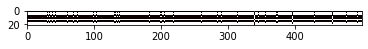

In [174]:
import matplotlib.pyplot as plt
import numpy as np

a = st.big_div
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()


In [57]:
    def forward(self, x, save_flag = False):
        if self.prms.feature_map == True:
            if x.is_cuda and not self.feature_mask.is_cuda:
                self.feature_mask = self.feature_mask.cuda()
            feats = torch.mm(x.view(-1,self.feature_mask.size(0)), self.feature_mask)
        else:
            feats = x

        self.d = [self.decision(node(feats)) for node in self.fc]
        
        self.d = torch.stack(self.d)

        decision = torch.cat((self.d,1-self.d),dim=2).permute(1,0,2)
        
        batch_size = x.size()[0]
        mu = x.data.new(x.size(0),1,1).fill_(1.)
        big_mu = x.data.new(x.size(0),2,1).fill_(1.)
        begin_idx = 1
        end_idx = 2
        for n_layer in range(0, self.depth):
            # mu stores the probability a sample is routed at certain node
            # repeat it to be multiplied for left and right routing
            mu = mu.repeat(1, 1, 2)
            # the routing probability at n_layer
            _decision = decision[:, begin_idx:end_idx, :] # -> [batch_size,2**n_layer,2]
            mu = mu*_decision # -> [batch_size,2**n_layer,2]
            begin_idx = end_idx
            end_idx = begin_idx + 2 ** (n_layer+1)
            # merge left and right nodes to the same layer
            mu = mu.view(x.size(0), -1, 1)
            big_mu = torch.cat((big_mu,mu),1)

        big_mu = big_mu.view(x.size(0), -1)    
        # self.mu_cache.append(big_mu)  
        return big_mu #-> [batch size,n_leaf]